In [31]:
import pickle

# Load the training data 
pickle_in = open("x_train.pickle","rb")
x_train = pickle.load(pickle_in)

# print(x_train)
pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

# Load the test data 

pickle_in = open("x_test.pickle","rb")
x_test = pickle.load(pickle_in)


pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)




In [32]:
print(x_train)
print(x_train.shape)

print(y_train)
print(y_train.shape)

print(x_test)
print(x_test.shape)

print(y_test)
print(y_test.shape)

print(x_train.shape[1:])


       gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
8861        1              0        0           0  0.035734             1   
630         1              0        1           0  0.633803             1   
10210       0              0        1           0  0.980264             1   
415         1              0        1           1  0.211268             1   
7034        0              0        0           1  0.009429             1   
...       ...            ...      ...         ...       ...           ...   
1337        1              0        0           0  0.098592             1   
4979        0              0        1           0  0.985915             1   
10292       1              1        0           0  0.721290             1   
6324        1              1        0           0  0.830986             1   
9673        0              0        0           0  0.064368             1   

       MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  

In [33]:
# no of churns in train 
print(sum(y_train==0))
print(sum(y_train==1))

# clearly this is an imbalanced dataset as y_train = 0 is much more than y_train = 1 -> IMBALANCED DATASET 

4122
4138


In [34]:
# The datasets are normalised and resized to the crt size

# Implement the model now !

# We are using CNN over ANN to reduce computations and to identify features quickly 


from tensorflow import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten 

# To analyse the data , we use tensorboard 
from tensorflow.keras.callbacks import TensorBoard

# We are going to do convolution and max pooling 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time 

# No of layers , node per layer , conv layer 

# import numpy as np

# x_train_array = np.array(x_train)
# x_train = x_train.reshape(-1,x_train.shape[0], x_train.shape[1],1)  # Replace height and width with the actual dimensions of your images

model = keras.Sequential([
    Dense(units = 40 , input_shape = (26,) ,activation = "relu"),
    Dense(units = 40,activation = "relu"),
    Dense(units = 20,activation = "relu"),

    Dense(units = 1,activation = "sigmoid"), #  binary classification - yes/no

])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),    
    optimizer=tf.keras.optimizers.Adam(0.001),metrics =["accuracy"], # Metric is what we want to measure 
)

model.fit(x_train,y_train,validation_split = 0.2,epochs = 14)

Epoch 1/14


/home/aniruth/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7048 - loss: 0.5808 - val_accuracy: 0.7875 - val_loss: 0.4574
Epoch 2/14
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7787 - loss: 0.4663 - val_accuracy: 0.7900 - val_loss: 0.4448
Epoch 3/14
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7844 - loss: 0.4505 - val_accuracy: 0.7718 - val_loss: 0.4569
Epoch 4/14
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7781 - loss: 0.4542 - val_accuracy: 0.7906 - val_loss: 0.4369
Epoch 5/14
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7929 - loss: 0.4442 - val_accuracy: 0.7869 - val_loss: 0.4330
Epoch 6/14
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4339 - val_accuracy: 0.7960 - val_loss: 0.4380
Epoch 7/14
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - loss: 0.4356 - val_accuracy: 0.7966 - val_loss: 0.4289
Epoch 8/14
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8112 - loss: 0.4132 - val_accuracy: 0.7954 - val_

In [35]:
# evaluate the model

test_loss , test_acc = model.evaluate(x_test,y_test)

print(f"Accuracy is {test_acc*100}")
print(f"Loss is {test_loss}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.7959 - loss: 0.4403
Accuracy is 80.63891530036926
Loss is 0.4294455349445343


In [36]:
# predict the test 

y_pred = model.predict(x_test)
print(y_pred)

print(y_pred.shape)
print(len(y_pred))

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[0.5676313 ]
 [0.3375276 ]
 [0.05778312]
 ...
 [0.08780605]
 [0.04135604]
 [0.02604289]]
(2066, 1)
2066


In [37]:
# Sigmoid - cut -off = 0.5

for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0
        
print(type(y_pred))
# convert the floats to int
y_pred = y_pred.astype(int)


print(y_pred)
print(y_pred.shape)
print(y_pred.ndim)

# flatten it to make it 1D
y_pred = y_pred.flatten()
print(y_pred.shape)
print(y_pred.ndim)


# print(y_test)
print(y_test.shape)

print(y_test.ndim)

# print(y_test)

<class 'numpy.ndarray'>
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(2066, 1)
2
(2066,)
1
(2066,)
1


In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 80.63891577928364


In [39]:
# Classification report

from sklearn.metrics import classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1041
           1       0.79      0.83      0.81      1025

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Text(95.72222222222221, 0.5, 'Truth')

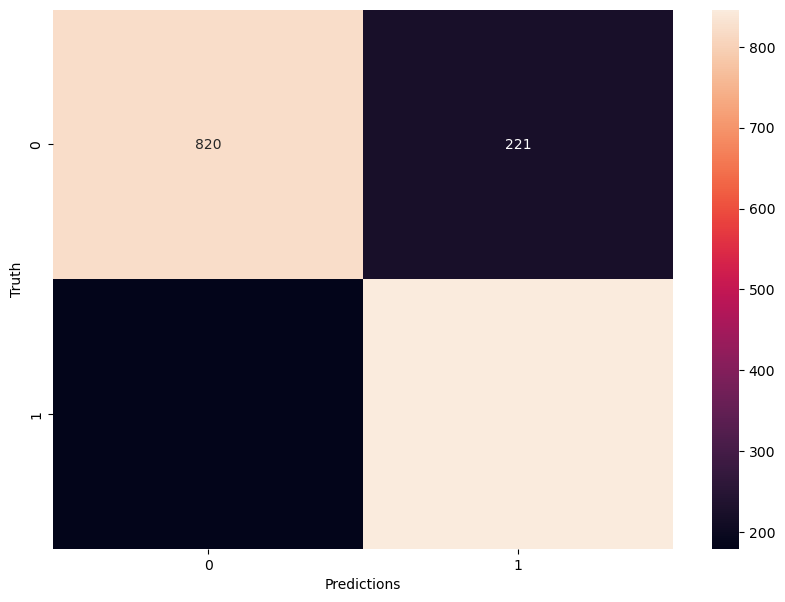

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt

cm = tf.math.confusion_matrix(labels = y_test , predictions = y_pred)

plt.figure(figsize = (10,7))
 
sn.heatmap(cm , annot = True , fmt = "d") 

plt.xlabel("Predictions")
plt.ylabel("Truth")

# along diag = crt predictions !!
